In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [5]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [7]:
df = pd.read_csv("data.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [9]:
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

In [10]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df["CCAvg"].value_counts()

CCAvg
0/30    241
1/00    231
0/20    204
2/00    188
0/80    187
       ... 
3/25      1
3/67      1
4/67      1
8/90      1
2/75      1
Name: count, Length: 108, dtype: int64

In [13]:
df.drop("ID", inplace=True, axis=1)

In [14]:
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [15]:
df.drop("CCAvg", inplace=True, axis=1)

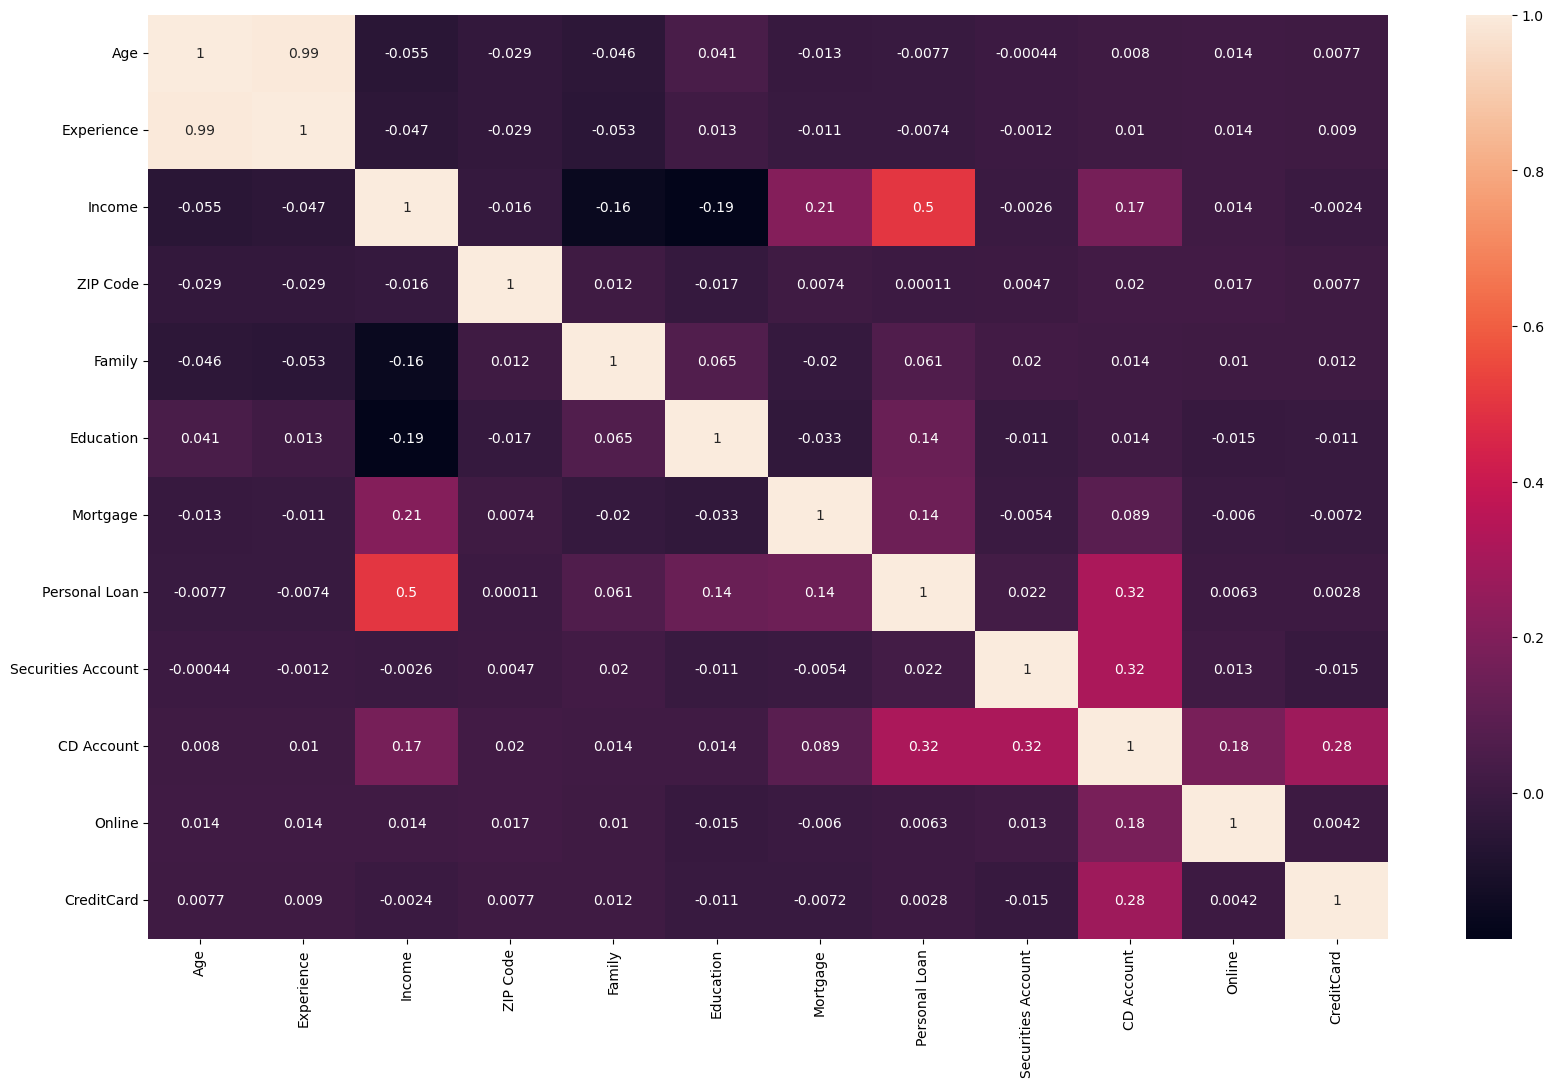

In [16]:
relations = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(data=relations, annot=True)
plt.show()

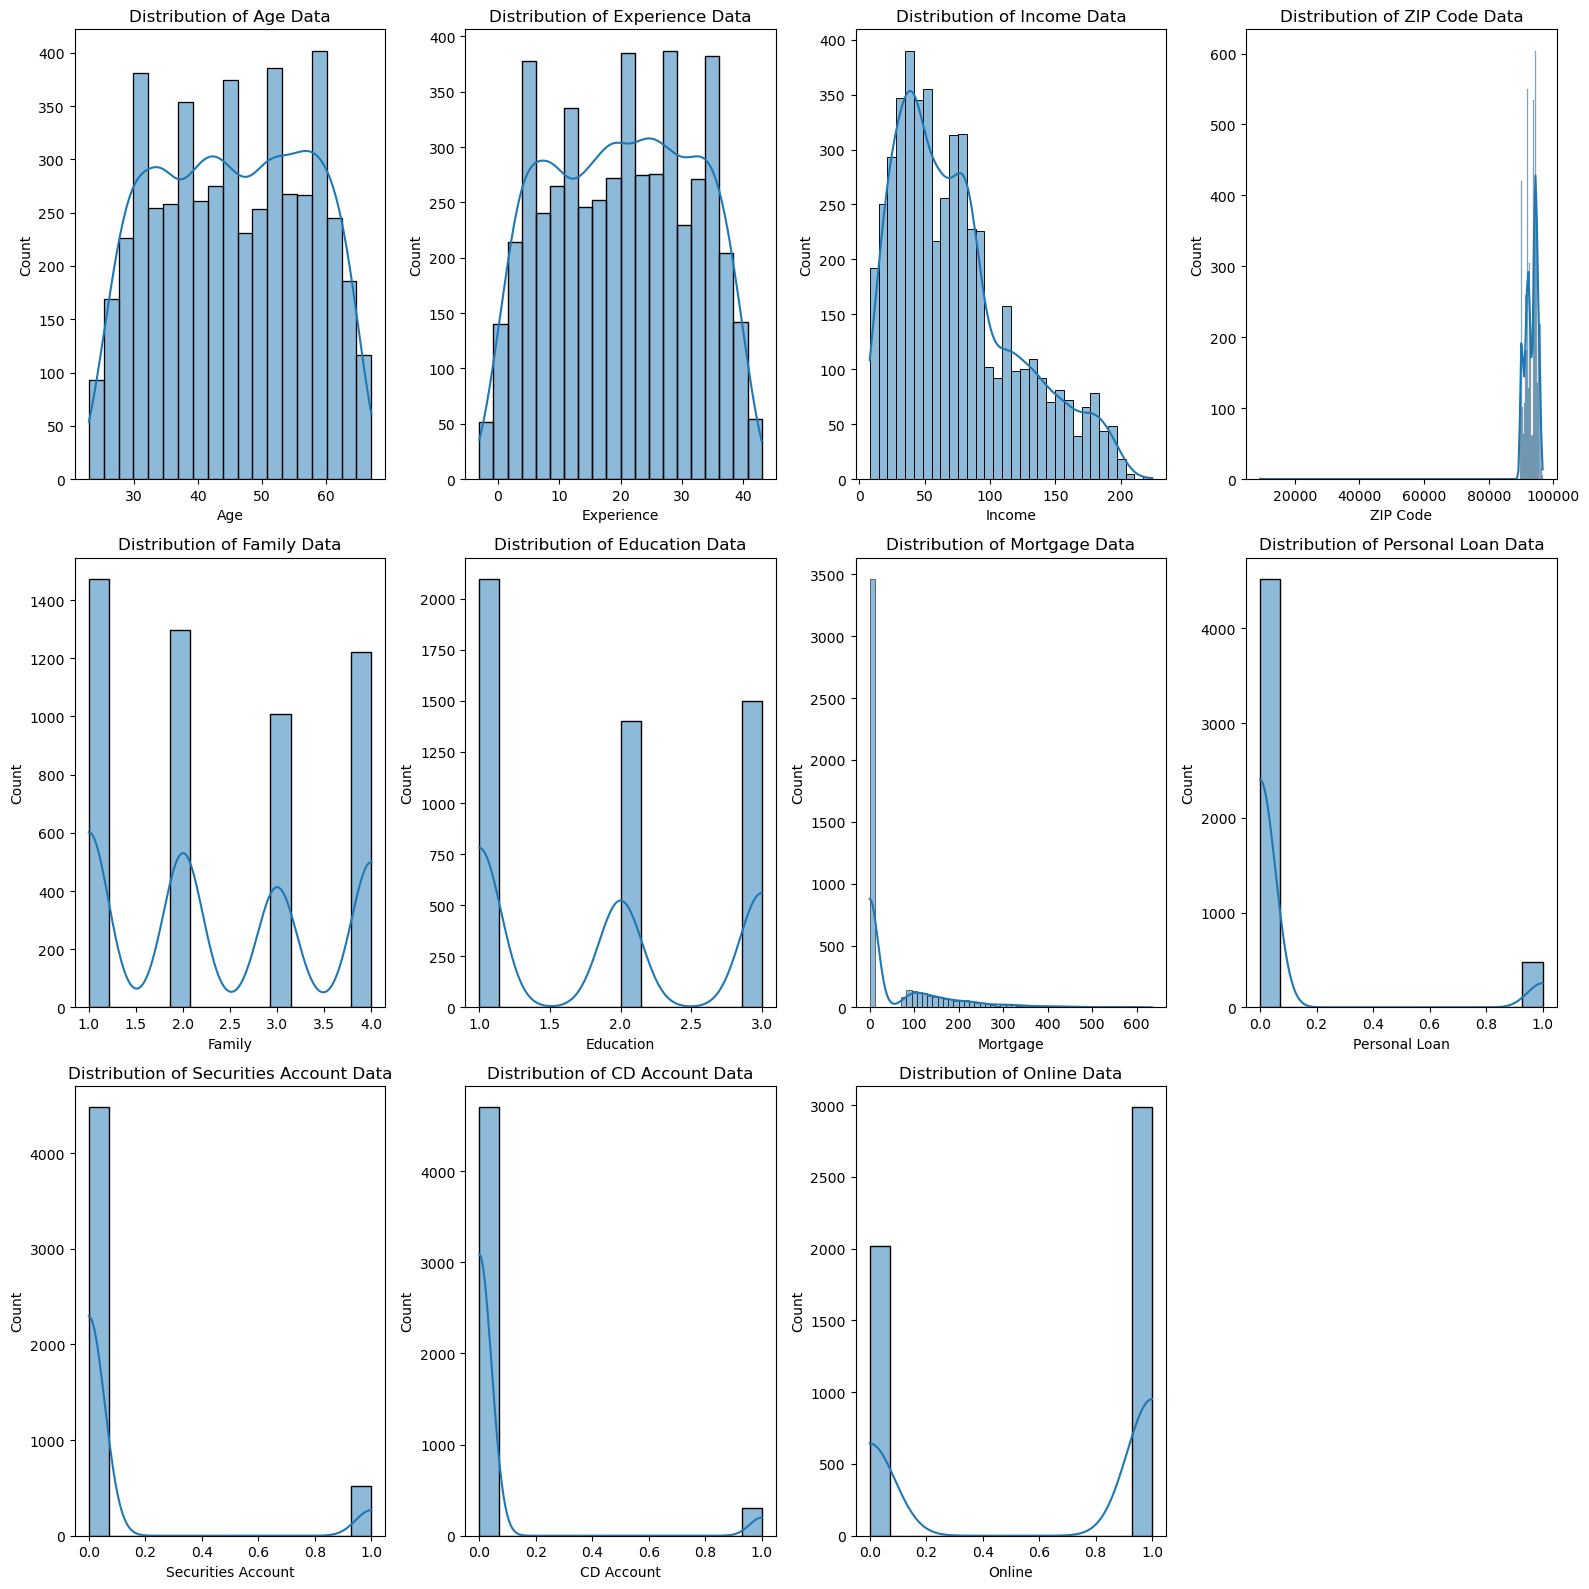

In [18]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

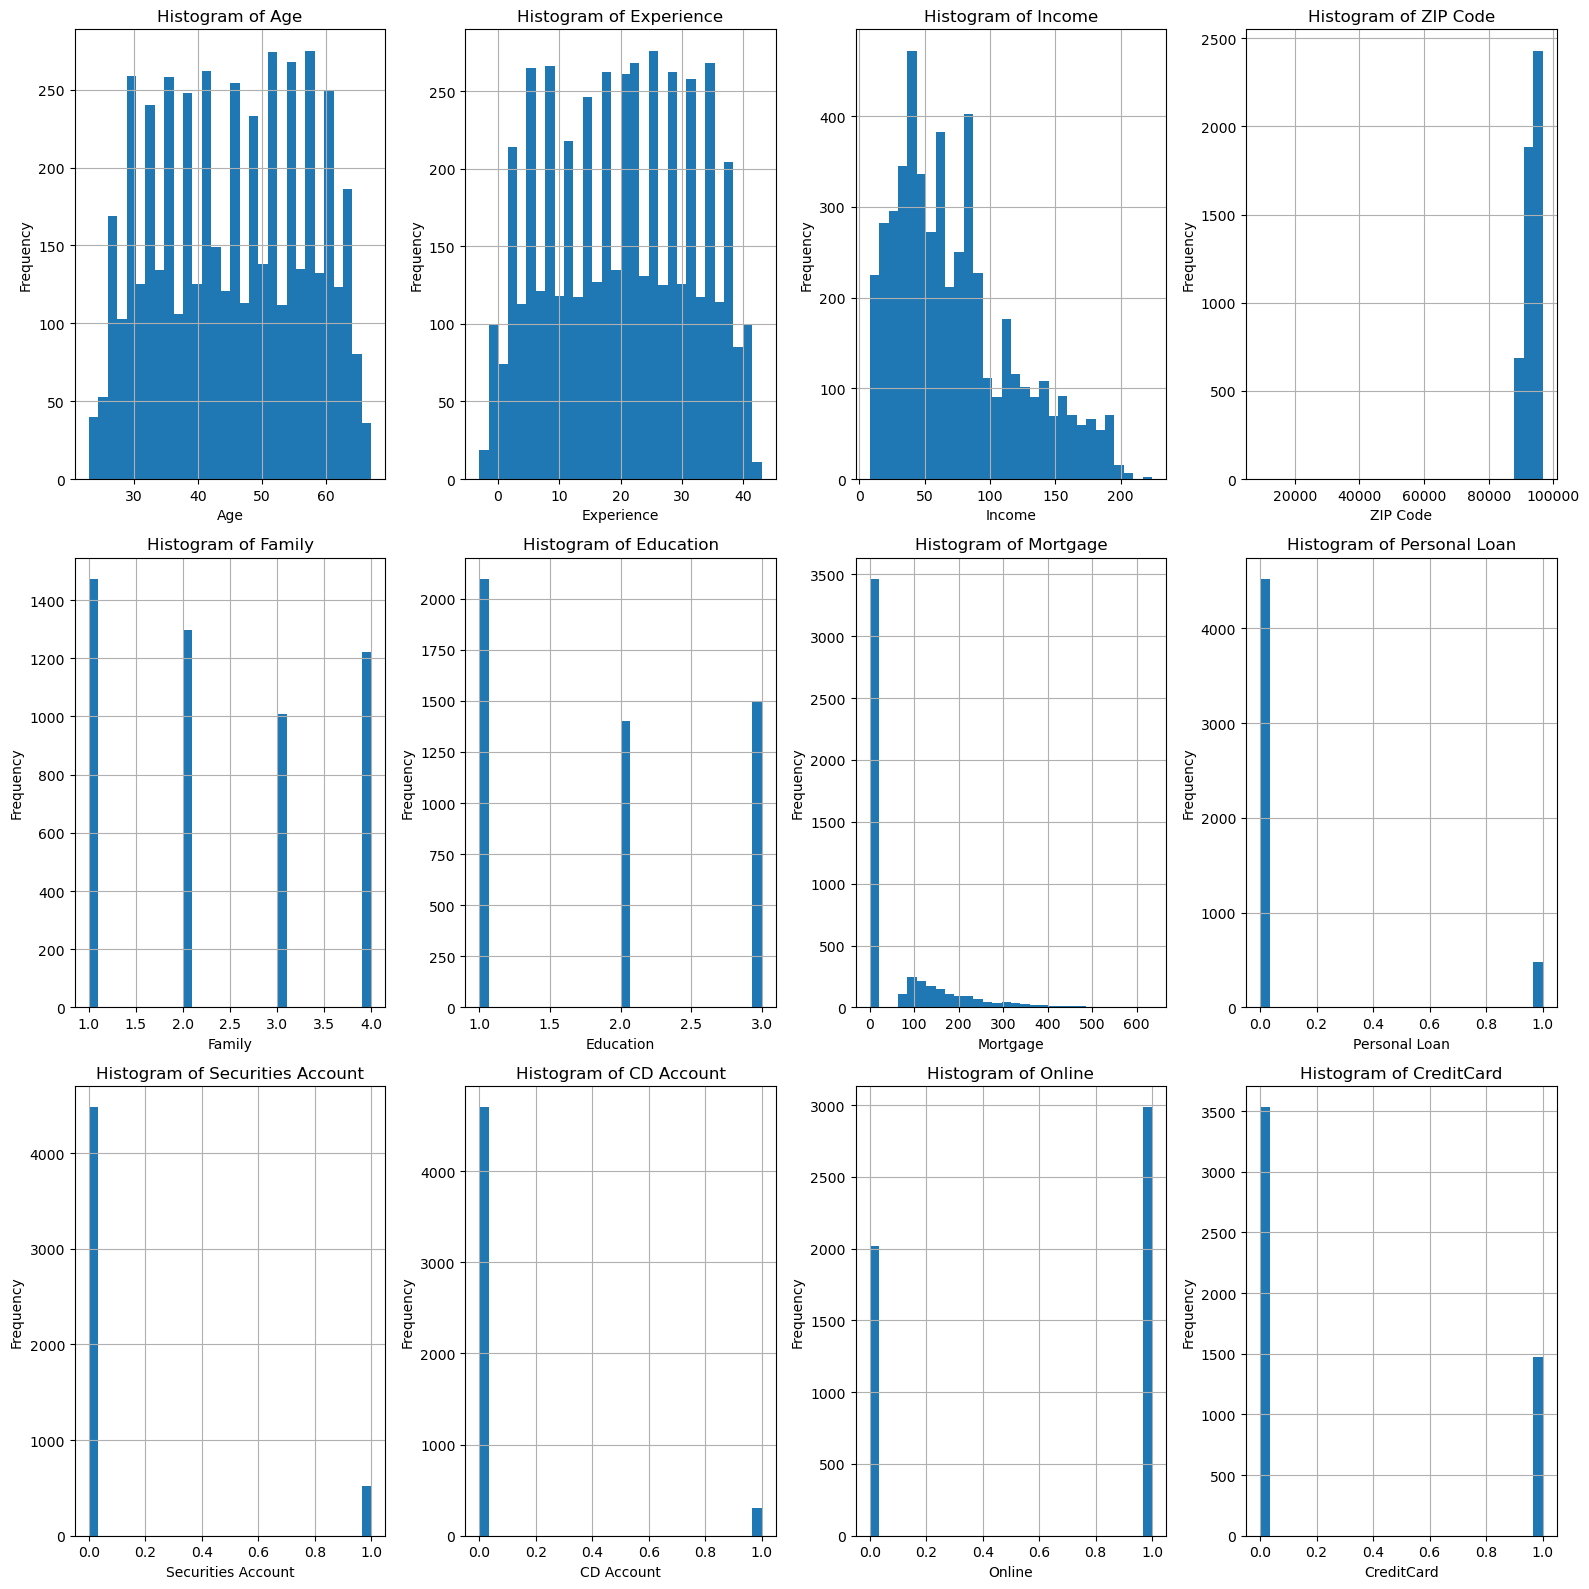

In [19]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns)  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up


for i, column in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.plot()

In [20]:
X, y = df.drop("CreditCard", axis=1), df["CreditCard"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.753
SVC Accuracy: 0.75
DecisionTreeClassifier Accuracy: 0.619
RandomForestClassifier Accuracy: 0.729
KNeighborsClassifier Accuracy: 0.685
GradientBoostingClassifier Accuracy: 0.749
GaussianNB Accuracy: 0.752
32/32 [==============================] - 0s 454us/step - loss: 0.5952 - accuracy: 0.7120
Sequential Model Accuracy: 0.7120000123977661
Sequential Model Loss: 0.59516441822052


,Model,Accuracy
0,LogisticRegression,0.753
1,SVC,0.750
2,DecisionTreeClassifier,0.619
3,RandomForestClassifier,0.729
4,KNeighborsClassifier,0.685
5,GradientBoostingClassifier,0.749
6,GaussianNB,0.752
7,Sequential,0.712


In [21]:
X, y = df.drop("CreditCard", axis=1), df["CreditCard"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.753
SVC Accuracy: 0.75
DecisionTreeClassifier Accuracy: 0.618
RandomForestClassifier Accuracy: 0.729
KNeighborsClassifier Accuracy: 0.693
GradientBoostingClassifier Accuracy: 0.749
GaussianNB Accuracy: 0.752
32/32 [==============================] - 0s 462us/step - loss: 0.5591 - accuracy: 0.7440
Sequential Model Accuracy: 0.7440000176429749
Sequential Model Loss: 0.5590656399726868


,Model,Accuracy
0,LogisticRegression,0.753
1,SVC,0.750
2,DecisionTreeClassifier,0.618
3,RandomForestClassifier,0.729
4,KNeighborsClassifier,0.693
5,GradientBoostingClassifier,0.749
6,GaussianNB,0.752
7,Sequential,0.744


In [22]:
X, y = df.drop("Personal Loan", axis=1), df["Personal Loan"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.951
SVC Accuracy: 0.971
DecisionTreeClassifier Accuracy: 0.973
RandomForestClassifier Accuracy: 0.985
KNeighborsClassifier Accuracy: 0.952
GradientBoostingClassifier Accuracy: 0.983
GaussianNB Accuracy: 0.905
32/32 [==============================] - 0s 579us/step - loss: 0.0819 - accuracy: 0.9790
Sequential Model Accuracy: 0.9789999723434448
Sequential Model Loss: 0.08187556266784668


,Model,Accuracy
0,LogisticRegression,0.951
1,SVC,0.971
2,DecisionTreeClassifier,0.973
3,RandomForestClassifier,0.985
4,KNeighborsClassifier,0.952
5,GradientBoostingClassifier,0.983
6,GaussianNB,0.905
7,Sequential,0.979


In [23]:
X, y = df.drop("Personal Loan", axis=1), df["Personal Loan"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.947
SVC Accuracy: 0.97
DecisionTreeClassifier Accuracy: 0.974
RandomForestClassifier Accuracy: 0.985
KNeighborsClassifier Accuracy: 0.948
GradientBoostingClassifier Accuracy: 0.983
GaussianNB Accuracy: 0.905
32/32 [==============================] - 0s 601us/step - loss: 0.0632 - accuracy: 0.9780
Sequential Model Accuracy: 0.9779999852180481
Sequential Model Loss: 0.06323549151420593


,Model,Accuracy
0,LogisticRegression,0.947
1,SVC,0.970
2,DecisionTreeClassifier,0.974
3,RandomForestClassifier,0.985
4,KNeighborsClassifier,0.948
5,GradientBoostingClassifier,0.983
6,GaussianNB,0.905
7,Sequential,0.978


In [24]:
entropy_df = calculate_entropy(df)
entropy_df

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
entropy,5.396028,5.409791,6.963595,8.186094,1.987169,1.561402,3.330696,0.456186,0.48279,0.329031,0.972792,0.873832


In [25]:
c_params = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for c in c_params:
  model = LogisticRegression(C=c, penalty="l1", solver="liblinear")
  model.fit(X_train_scaled, y_train_encoded)
  predictions = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test_encoded, predictions)
  print(f"Accuracy for C={c}: {accuracy}")

Accuracy for C=0.01: 0.895
Accuracy for C=0.1: 0.944
Accuracy for C=0.2: 0.946
Accuracy for C=0.3: 0.948
Accuracy for C=0.4: 0.951
Accuracy for C=0.5: 0.951
Accuracy for C=0.6: 0.95
Accuracy for C=0.7: 0.95
Accuracy for C=0.8: 0.95
Accuracy for C=0.9: 0.951


In [26]:
c_params = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for c in c_params:
  model = LogisticRegression(C=c, penalty="l2", solver="lbfgs")
  model.fit(X_train_scaled, y_train_encoded)
  predictions = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test_encoded, predictions)
  print(f"Accuracy for C={c}: {accuracy}")

Accuracy for C=0.01: 0.895
Accuracy for C=0.1: 0.927
Accuracy for C=0.2: 0.936
Accuracy for C=0.3: 0.944
Accuracy for C=0.4: 0.947
Accuracy for C=0.5: 0.945
Accuracy for C=0.6: 0.944
Accuracy for C=0.7: 0.943
Accuracy for C=0.8: 0.945
Accuracy for C=0.9: 0.946
